In [ ]:
# !unzip fat

In [5]:
# os.remove('fit_man/.DS_Store')

In [6]:
# os.remove('fat_man/.DS_Store')

In [7]:
# os.remove('fat_woman/.DS_Store')

In [8]:
# os.remove('fit_woman/.DS_Store')

In [ ]:
# import shutil

# shutil.rmtree('__MACOSX')

In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical 
import os
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import cv2

In [39]:
def corp_to_square_than_resize(img, new_width=None, new_height=None):
  width, height = img.size    # Get dimensions
  
  if new_width is None:
      new_width = min(width, height)
  if new_height is None:
      new_height = min(width, height)
  
  left = np.ceil((width - new_width) / 2)
  right = width - np.floor((width - new_width) / 2)

  top = int(np.ceil((height - new_height) / 2))
  bottom = height - np.floor((height - new_height) / 2)

  center_cropped_img = img.crop((left, top, right, bottom))

  return center_cropped_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


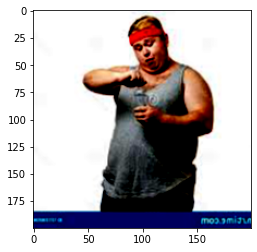

[1. 0. 0. 0.]


In [40]:
X = [] #images
Y = [] #catgorias

name_encode = {"fat_man":0, "fit_man":1, "fat_woman":2, "fit_woman":3}
num_classes = len(name_encode)


def images_to_array(folder):
  for image_name in os.listdir(folder):
    loaded_image = Image.open(os.path.join(folder, image_name))
    croped_image = corp_to_square_than_resize(loaded_image)
    resized_image = Image.Image.resize(croped_image, [200,200])
    image_array = np.array(resized_image)
    X.append(image_array)
    Y.append(name_encode[folder])

    image_flipped = cv2.flip(image_array, 1)
    X.append(image_flipped)
    Y.append(name_encode[folder])

    image_blurred = cv2.blur(image_array, (2,2))
    X.append(image_blurred)
    Y.append(name_encode[folder])

    image_flipped_blurred = cv2.blur(image_flipped, (2,2))
    X.append(image_flipped_blurred)
    Y.append(name_encode[folder])


def show_image(index):
  plt.imshow(X[index])
  plt.show()
  print(Y[index])


images_to_array('fat_man')
images_to_array('fit_man')
images_to_array('fat_woman')
images_to_array('fit_woman')

Y = to_categorical(Y, num_classes=num_classes)
# normalayzing X data
X = (np.array(X) - 127.5) / 127.5
# show_image(47)

In [64]:
model = Sequential()
model.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(400, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(400, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization()) 
model.add(Dropout(rate=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(400, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 200, 200, 32)      2432      
_________________________________________________________________
batch_normalization_8 (Batch (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 400)     320400    
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 100, 400)     1600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100, 400)     0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 400)      

In [65]:
 X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [82]:
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, batch_size=10, epochs=35, validation_data = (X_test, y_test))
model.save('fit_fat_CNN_V2.h5')

Epoch 1/35
232/232 [==============================] - 34s 146ms/step - loss: 1.3993e-07 - accuracy: 1.0000 - val_loss: 0.4997 - val_accuracy: 0.9690
Epoch 2/35
232/232 [==============================] - 34s 146ms/step - loss: 0.0396 - accuracy: 0.9944 - val_loss: 0.5803 - val_accuracy: 0.9457
Epoch 3/35
232/232 [==============================] - 34s 145ms/step - loss: 0.0611 - accuracy: 0.9909 - val_loss: 0.9487 - val_accuracy: 0.9302
Epoch 4/35
232/232 [==============================] - 34s 146ms/step - loss: 0.0184 - accuracy: 0.9957 - val_loss: 0.8591 - val_accuracy: 0.9380
Epoch 5/35
232/232 [==============================] - 34s 146ms/step - loss: 0.0172 - accuracy: 0.9974 - val_loss: 0.7834 - val_accuracy: 0.9302
Epoch 6/35
232/232 [==============================] - 34s 146ms/step - loss: 0.0292 - accuracy: 0.9953 - val_loss: 0.7521 - val_accuracy: 0.9419
Epoch 7/35
232/232 [==============================] - 34s 146ms/step - loss: 0.0350 - accuracy: 0.9935 - val_loss: 0.5028 - va

No handles with labels found to put in legend.


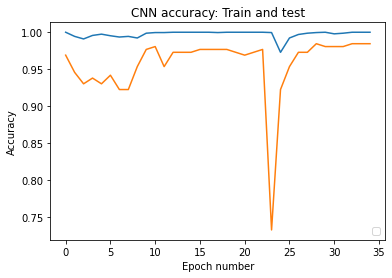

In [83]:
# plt.plot(h.history['accuracy'])
# plt.plot(h.history['val_accuracy'])
# plt.title("CNN accuracy: Train and test")
# plt.xlabel('Epoch number')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


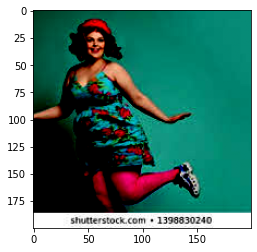

[0. 0. 1. 0.]
fat_woman


In [84]:
from keras.models import load_model


model = load_model('fit_fat_CNN.h5')

def fatness_prediction(index_number):
  # img = (np.array(X[index_number]) - 127.5) / 127,5
  reshaped_img = X[index_number].reshape(1,200,200,3)
  prediction = model.predict_classes(reshaped_img)
  show_image(index_number)
  for key, value in name_encode.items():
    if value == prediction:
      print(key)
  


fatness_prediction(1900)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


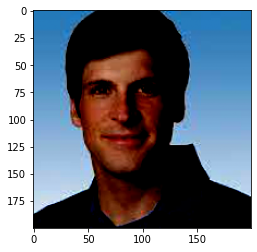

[0. 1. 0. 0.]
fit_man


In [85]:
fatness_prediction(1000)

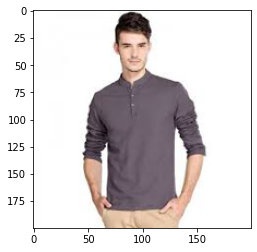

[1]
fit_man


In [86]:
# model = load_model('fit_fat_CNN.h5')

# def fatness_prediction_load(image_path):
#   image_loaded = Image.open(image_path)
#   croped_image = corp_to_square_than_resize(image_loaded)
#   resized_image = Image.Image.resize(croped_image, (200,200))
#   image_normalized = (np.array(resized_image) - 127.5) / 127.5
#   reshaped_img = image_normalized.reshape(1,200,200,3)
#   prediction = model.predict_classes(reshaped_img)
#   plt.imshow(resized_image)
#   plt.show()
#   print(prediction)
#   for key, value in name_encode.items():
#     if value == prediction:
#       print(key)
  

# fatness_prediction_load('fm4.jpeg')

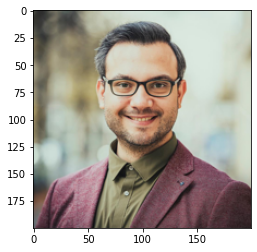

[3]
fit_woman


In [93]:

# fatness_prediction_load('w3.jpg')